Ensemble techniques are methods in machine learning where multiple models are combined to improve the overall performance of the system. Instead of relying on a single model to make predictions, ensemble techniques leverage the wisdom of the crowd by aggregating predictions from multiple models. The idea behind ensemble techniques is that combining multiple weak or diverse models can lead to a stronger, more robust model that generalizes better to unseen data.

There are several types of ensemble techniques, including:

1. **Bagging (Bootstrap Aggregating)**: Bagging involves training multiple instances of the same base model on different subsets of the training data, sampled with replacement (bootstrap sampling). The final prediction is typically the average or majority vote of the predictions made by individual models. Random Forest is a popular ensemble method based on bagging, where decision trees are trained on bootstrapped samples of the training data and combined through a voting mechanism.

2. **Boosting**: Boosting is an iterative ensemble technique where base models are trained sequentially, and each subsequent model focuses on improving the performance of instances that were misclassified by previous models. Boosting algorithms assign weights to training instances and update these weights iteratively to give more importance to misclassified instances. Examples of boosting algorithms include AdaBoost (Adaptive Boosting) and Gradient Boosting Machines (GBM).

3. **Stacking (Stacked Generalization)**: Stacking combines predictions from multiple base models using a meta-model (also called a blender or meta-learner). Instead of simply averaging or voting on predictions, stacking trains a meta-model on the predictions made by individual base models. The meta-model learns to combine the predictions in a way that maximizes overall performance. Stacking often requires a separate validation dataset to train the meta-model and prevent overfitting.

4. **Voting**: Voting is a simple ensemble technique where predictions from multiple base models are aggregated through a majority vote (for classification tasks) or averaging (for regression tasks). There are different types of voting, such as hard voting (simple majority) and soft voting (weighted average based on confidence scores or probabilities).

Ensemble techniques are widely used in practice because they often lead to improved performance, increased robustness, and better generalization compared to individual models. They are particularly effective when combined with diverse base models that capture different aspects of the data or when dealing with noisy or uncertain datasets.

In [5]:
df = pd.read_csv('heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [6]:
### voting
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import statistics as st
import warnings
warnings.filterwarnings('ignore')

# SPLITTING THE DATASET
df = pd.read_csv('heart.csv')
x = df.drop('target', axis = 1)
y = df['target']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# MODELS CREATION
model1 = DecisionTreeClassifier()
model2 = KNeighborsClassifier()
model3= LogisticRegression()

model1.fit(x_train,y_train)
model2.fit(x_train,y_train)
model3.fit(x_train,y_train)

# PREDICTION calss 0,1,1 
pred1=model1.predict(x_test) #0 
pred2=model2.predict(x_test)#1
pred3=model3.predict(x_test)#1

# FINAL_PREDICTION
final_pred = np.array([])
for i in range(0,len(x_test)):
    final_pred = np.append(final_pred, st.mode([pred1[i], pred2[i], pred3[i]]))
print(final_pred)

[1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1.
 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0.
 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1.
 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1.
 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1.]


In [7]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,final_pred)

0.9463414634146341

In [8]:
from sklearn.ensemble import VotingClassifier
model1 = LogisticRegression(random_state=1)
model2 = DecisionTreeClassifier(random_state=1)
model = VotingClassifier(estimators=[('lr', model1), ('dt', model2)], voting='hard')
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.9658536585365853

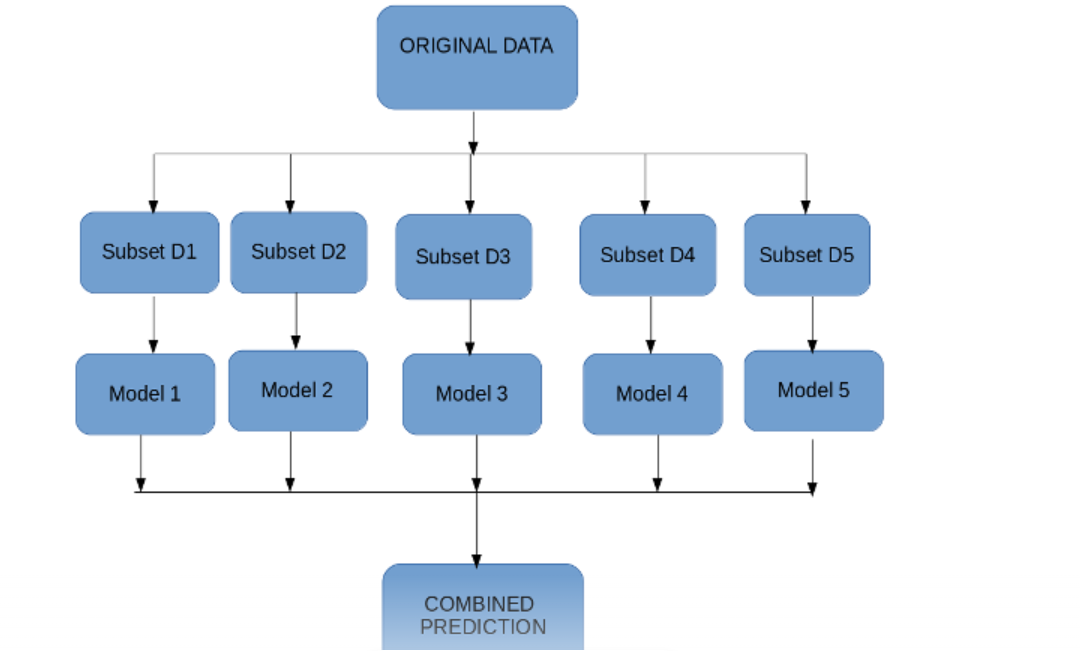

#### Bagging meta-estimator
Bagging meta-estimator is an ensembling algorithm that can be used for both classification (BaggingClassifier) and regression (BaggingRegressor) problems. It follows the typical bagging technique to make predictions. Following are the steps for the bagging meta-estimator algorithm:

1. Random subsets are created from the original dataset (Bootstrapping).
2. The subset of the dataset includes all features.
3. A user-specified base estimator is fitted on each of these smaller sets.
4. Predictions from each model are combined to get the final result.

Random Forest is an ensemble learning method used for classification and regression tasks. It works by constructing multiple decision trees during training and outputting the mode (classification) or mean (regression) of the individual trees' predictions as the final prediction.

Here's a step-by-step explanation of how Random Forest works:

1. **Bootstrapped Sampling**: Random Forest uses a technique called bootstrapped sampling to create multiple subsets of the training data. For each tree in the forest, a random sample of the training data is drawn with replacement (bootstrapping). This means that some instances may be sampled multiple times, while others may not be sampled at all.

2. **Random Feature Selection**: At each node of the decision tree, instead of considering all features to make the split, Random Forest randomly selects a subset of features. This helps to introduce diversity among the trees in the forest and prevents the model from being overly sensitive to any particular feature.

3. **Decision Tree Construction**: Using the bootstrapped sample and random feature subset, a decision tree is constructed for each subset of the data. The trees are grown to their maximum depth without pruning.

4. **Voting (Classification) or Averaging (Regression)**: After all the trees are constructed, predictions are made for each tree. For classification tasks, the mode (most frequent class) of the individual tree predictions is taken as the final prediction. For regression tasks, the mean of the individual tree predictions is taken as the final prediction.

5. **Aggregate Predictions**: The final prediction of the Random Forest is the aggregated prediction from all the individual trees.

Random Forest offers several advantages:

- It typically provides higher accuracy compared to individual decision trees, especially in complex datasets.
- It reduces overfitting by averaging the predictions of multiple trees.
- It handles missing values and maintains accuracy when a large proportion of the data is missing.
- It provides estimates of feature importance, which can be useful for feature selection.

Overall, Random Forest is a powerful and versatile ensemble learning method that is widely used in practice for both classification and regression tasks.

In [19]:
# Importing required libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Loading the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating the Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the classifier
clf.fit(X_train, y_train)

# Predicting on the test set
y_pred = clf.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


Before we go further, here’s another question for you: If a data point is incorrectly predicted by the first model, and then the next (probably all models), will combining the predictions provide better results? Such situations are taken care of by boosting.

Boosting is a sequential process, where each subsequent model attempts to correct the errors of the previous model. The succeeding models are dependent on the previous model. Let’s understand the way boosting works in the below steps.

A subset is created from the original dataset.

Initially, all data points are given equal weights.

A base model is created on this subset.

This model is used to make predictions on the whole dataset.

Errors are calculated using the actual values and predicted values.

The observations which are incorrectly predicted, are given higher weights.

(Here, the three misclassified blue-plus points will be given higher weights)

Another model is created and predictions are made on the dataset.

(This model tries to correct the errors from the previous model)

Similarly, multiple models are created, each correcting the errors of the previous model.

The final model (strong learner) is the weighted mean of all the models (weak

Boosting algorithms:

AdaBoost

GBM

XGBM

Light GBM

CatBoost

### GB

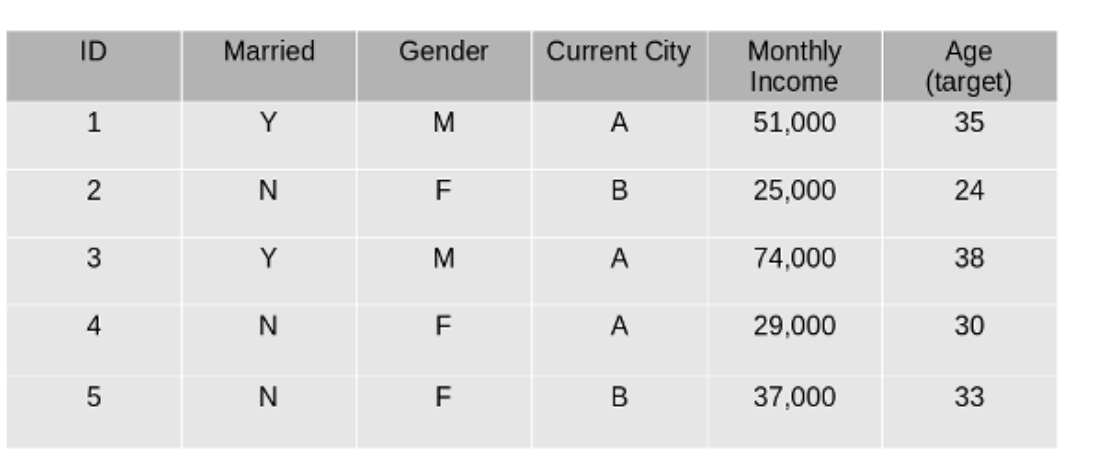

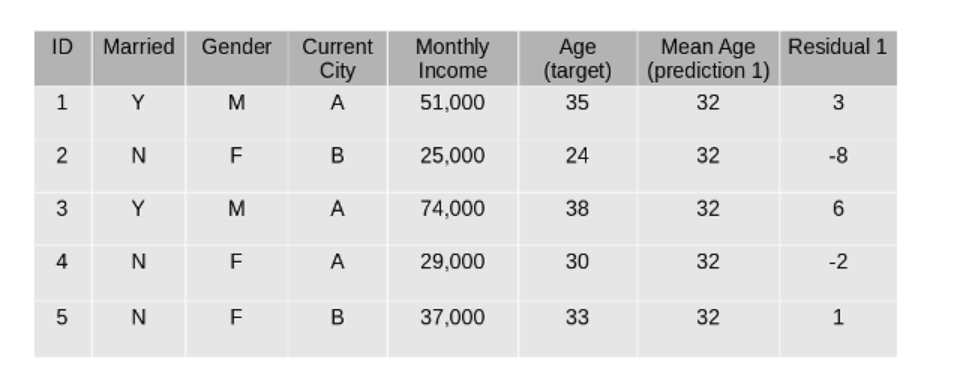

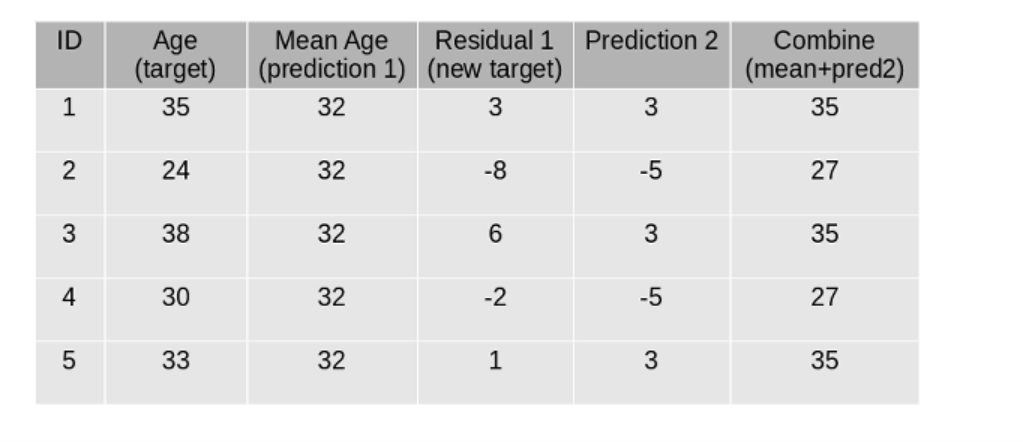

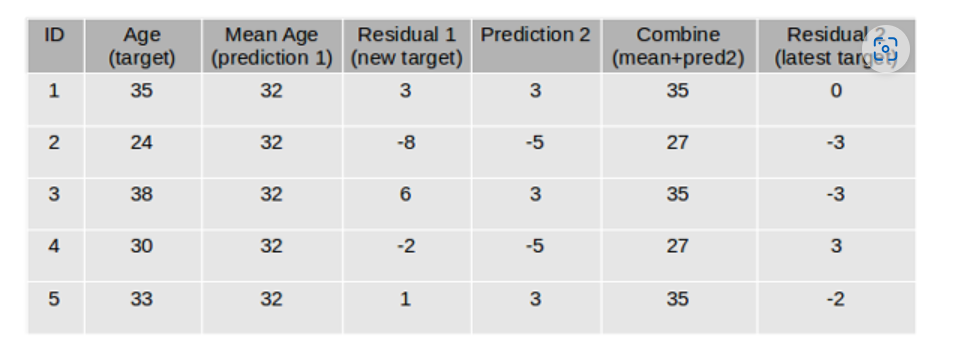